In [51]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import time
plt.style.use('seaborn')

In [52]:
url = 'https://api.exchangerate.host/latest'
response = requests.get(url)
data = response.json()

print(data)

{'motd': {'msg': 'If you or your company use this project or like what we doing, please consider backing us so we can continue maintaining and evolving this project.', 'url': 'https://exchangerate.host/#/donate'}, 'success': True, 'base': 'EUR', 'date': '2022-04-08', 'rates': {'AED': 3.987538, 'AFN': 96.022463, 'ALL': 121.334474, 'AMD': 520.381863, 'ANG': 1.96326, 'AOA': 476.216549, 'ARS': 121.531785, 'AUD': 1.452061, 'AWG': 1.953529, 'AZN': 1.846373, 'BAM': 1.954982, 'BBD': 2.171592, 'BDT': 93.869824, 'BGN': 1.953842, 'BHD': 0.409059, 'BIF': 2233.886658, 'BMD': 1.086163, 'BND': 1.478474, 'BOB': 7.485064, 'BRL': 5.159781, 'BSD': 1.086481, 'BTC': 2.5e-05, 'BTN': 82.674665, 'BWP': 12.54063, 'BYN': 3.549206, 'BZD': 2.194681, 'CAD': 1.366867, 'CDF': 2177.461144, 'CHF': 1.015601, 'CLF': 0.03248, 'CLP': 874.928689, 'CNH': 6.909477, 'CNY': 6.905302, 'COP': 4086.634351, 'CRC': 714.454282, 'CUC': 1.08658, 'CUP': 27.951016, 'CVE': 110.173726, 'CZK': 24.508936, 'DJF': 193.813318, 'DKK': 7.435702,

In [54]:
fx = pd.DataFrame(data)
fx

,motd,success,base,date,rates
msg,If you or your company use this project or lik...,True,EUR,2022-04-08,NaN
url,https://exchangerate.host/#/donate,True,EUR,2022-04-08,NaN
AED,NaN,True,EUR,2022-04-08,3.987538
AFN,NaN,True,EUR,2022-04-08,96.022463
ALL,NaN,True,EUR,2022-04-08,121.334474
...,...,...,...,...,...
XPT,NaN,True,EUR,2022-04-08,0.001257
YER,NaN,True,EUR,2022-04-08,271.635319
ZAR,NaN,True,EUR,2022-04-08,16.030045
ZMW,NaN,True,EUR,2022-04-08,19.107243


In [56]:
fx.isnull()

,motd,success,base,date,rates
msg,False,False,False,False,True
url,False,False,False,False,True
AED,True,False,False,False,False
AFN,True,False,False,False,False
ALL,True,False,False,False,False
...,...,...,...,...,...
XPT,True,False,False,False,False
YER,True,False,False,False,False
ZAR,True,False,False,False,False
ZMW,True,False,False,False,False


In [82]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, msg to ZWL
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   motd     2 non-null      object 
 1   success  171 non-null    bool   
 2   base     171 non-null    object 
 3   date     171 non-null    object 
 4   rates    169 non-null    float64
dtypes: bool(1), float64(1), object(3)
memory usage: 6.8+ KB


In [83]:
fx2 = fx.loc[:, ["rates"]]
fx2

,rates
msg,NaN
url,NaN
AED,3.987538
AFN,96.022463
ALL,121.334474
...,...
XPT,0.001257
YER,271.635319
ZAR,16.030045
ZMW,19.107243


In [119]:
fx3=fx2.dropna().reset_index()
fx3

,index,rates
0,AED,3.987538
1,AFN,96.022463
2,ALL,121.334474
3,AMD,520.381863
4,ANG,1.963260
...,...,...
164,XPT,0.001257
165,YER,271.635319
166,ZAR,16.030045
167,ZMW,19.107243


In [120]:
fx3[fx3['index'].str.match('USD')]

,index,rates
149,USD,1.086657


In [121]:
fx4 = fx3.query('rates < 2 & rates > 1')
fx4

,index,rates
4,ANG,1.963260
7,AUD,1.452061
8,AWG,1.953529
9,AZN,1.846373
10,BAM,1.954982
13,BGN,1.953842
16,BMD,1.086163
17,BND,1.478474
20,BSD,1.086481
26,CAD,1.366867


<AxesSubplot:xlabel='index', ylabel='rates'>

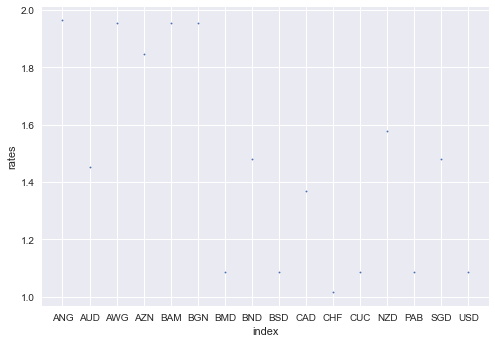

In [122]:
fx4.plot.scatter('index','rates', s=2)

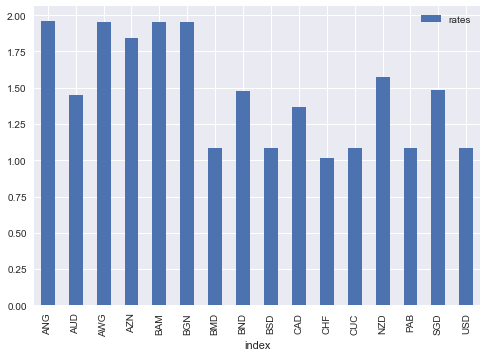

In [123]:
ax = fx4.plot.bar(x='index', y='rates')